In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from verificators import ActiveVerificator, AgglomerativeVerificator, MeanShiftVerificator, AffinityVerificator
from tester import ClusteringTester

In [3]:
with open('data/embeddings_labeled.pkl', 'rb') as f:
	embeddings, labels = tuple(map(np.array, pickle.load(f)))

In [12]:
verificator = ActiveVerificator()
tester = ClusteringTester(verificator, embeddings, labels)
active_results = tester.test(n_utts_per_user_type1=3, use_tqdm=True)
print(active_results)

100%|██████████| 5000/5000 [00:40<00:00, 123.60it/s]


{'clustering_acc': 1.0, 'v_measure_total': 0.9879616147880405, 'v_measure_correct': 0.9879616147880405, 'guest_detection_eer': 0.025111999999910813}


In [7]:
cos_avg_results = []
for threshold in tqdm(np.arange(0.5, 0.91, 0.02)):
    verificator = AgglomerativeVerificator(threshold, 'cosine', 'average')
    tester = ClusteringTester(verificator, embeddings, labels)
    result = tester.test()
    result['threshold'] = threshold
    cos_avg_results.append(result)

100%|██████████| 21/21 [15:52<00:00, 45.34s/it]


In [36]:
euc_avg_results = []
for threshold in tqdm(np.arange(50, 65, 1)):
    verificator = AgglomerativeVerificator(threshold, 'euclidean', 'average')
    tester = ClusteringTester(verificator, embeddings, labels)
    result = tester.test(n_tests=1000)
    result['threshold'] = threshold
    euc_avg_results.append(result)

100%|██████████| 15/15 [02:02<00:00,  8.19s/it]


In [43]:
euc_ward_results = []
for threshold in tqdm(np.arange(60, 90, 2)):
    verificator = AgglomerativeVerificator(threshold, 'euclidean', 'ward')
    tester = ClusteringTester(verificator, embeddings, labels)
    result = tester.test(n_tests=1000)
    result['threshold'] = threshold
    euc_ward_results.append(result)

100%|██████████| 15/15 [02:05<00:00,  8.38s/it]


In [13]:
meanshift_results = []
for threshold in tqdm(np.arange(40, 50, 1)):
    verificator = MeanShiftVerificator(threshold)
    tester = ClusteringTester(verificator, embeddings, labels)
    result = tester.test(n_tests=200)
    result['threshold'] = threshold
    meanshift_results.append(result)

100%|██████████| 10/10 [01:01<00:00,  6.11s/it]


In [5]:
verificator = AffinityVerificator('cosine')
tester = ClusteringTester(verificator, embeddings, labels)
affcos_result = tester.test(n_tests=1000, use_tqdm=True)
affcos_result

 56%|█████▌    | 558/1000 [00:07<00:05, 75.41it/s]

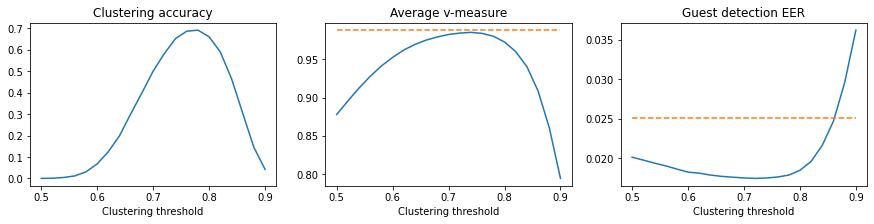

In [19]:
accs, vms, vmcs, geers, ths = zip(*[list(result.values()) for result in cos_avg_results])

plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.title('Clustering accuracy')
plt.xlabel('Clustering threshold')
plt.plot(ths, accs)

plt.subplot(1, 3, 2)
plt.title('Average v-measure')
plt.xlabel('Clustering threshold')
plt.plot(ths, vms)
plt.plot(ths, [active_results['v_measure_total']] * len(ths), '--')

plt.subplot(1, 3, 3)
plt.title('Guest detection EER')
plt.xlabel('Clustering threshold')
plt.plot(ths, geers)
plt.plot(ths, [active_results['guest_detection_eer']] * len(ths), '--')

plt.show()